In [1]:
import csv
import os
import pandas as pd
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append('../../code')
import matplotlib.pyplot as plt
import datetime

In [2]:
gdfs = []
dfs= []

from helpers.load_routes import load_routes
load_routes(gdfs, dfs)

In [3]:
all_routes_gdf = gpd.GeoDataFrame(pd.concat(gdfs))
from helpers.calculate_city_routes import calculate_city_routes

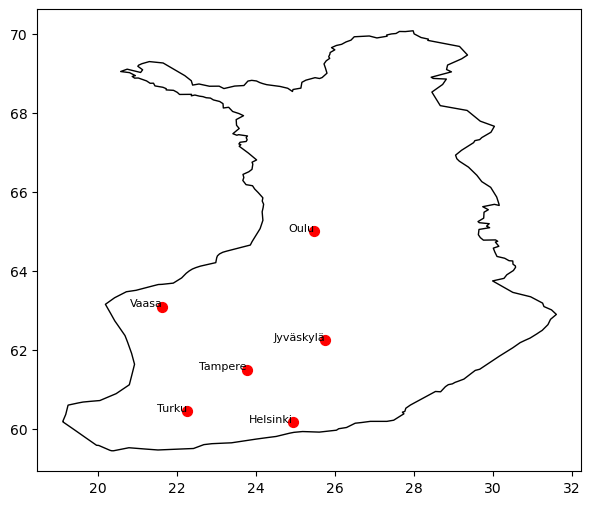

In [4]:
stations = [
        {
        "name": "Jyväskylä",
        "coordinates": [62.2426, 25.7473]
    },    {
        "name": "Helsinki",
        "coordinates": [60.1699, 24.9384]
    },    {
        "name": "Tampere",
        "coordinates": [61.4971, 23.7526]
    },    {
        "name": "Oulu",
        "coordinates": [65.0121, 25.4651]
    },    {
        "name": "Turku",
        "coordinates": [60.4518, 22.2486]
    },
        {
        "name": "Vaasa",
        "coordinates": [63.0950, 21.6164]
    },
    
]
stations_df = pd.DataFrame(stations)
stations_df['geometry'] = stations_df['coordinates'].apply(lambda x: Point(x[1], x[0]))  
stations_gdf = gpd.GeoDataFrame(stations_df, geometry='geometry')


finland = gpd.read_file('../data/suomi.geojson')


ax = finland.plot(figsize=(10, 6), color='white', edgecolor='black')


stations_gdf.plot(ax=ax, color='red', markersize=50)


for x, y, label in zip(stations_gdf.geometry.x, stations_gdf.geometry.y, stations_gdf['name']):
    plt.text(x, y, label, fontsize=8, ha='right')

plt.show()

In [6]:

for station in stations: 
    lon = station["coordinates"][1]
    lat = station["coordinates"][0]
    geometry = [Point(lon, lat)]
    city_gdf = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
    city_3067 = city_gdf
    routes_3067 = all_routes_gdf

    cols = routes_3067.columns
    city_routes = pd.DataFrame(columns=cols)

    city_routes["10k"] = ""
    city_routes["500m"] = ""
    city_routes["100m"] = ""


    calculate_city_routes(routes_3067, city_3067, city_routes)
    datetime.date.today()
    date = datetime.date.today()
    export = city_routes
    export.to_csv(f"./city_route_data/{station['name']}_{date}.csv", index=False)